# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [17]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [28]:
from langsmith import Client
client = Client()
prompt = client.pull_prompt("master_yoda", include_model=True)

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [27]:
prompt

ChatPromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='You are Master Yoda. Teach about {topic}. \nKeep your sentences short, mysterious, and in Yoda’s speech style.'), additional_kwargs={})])

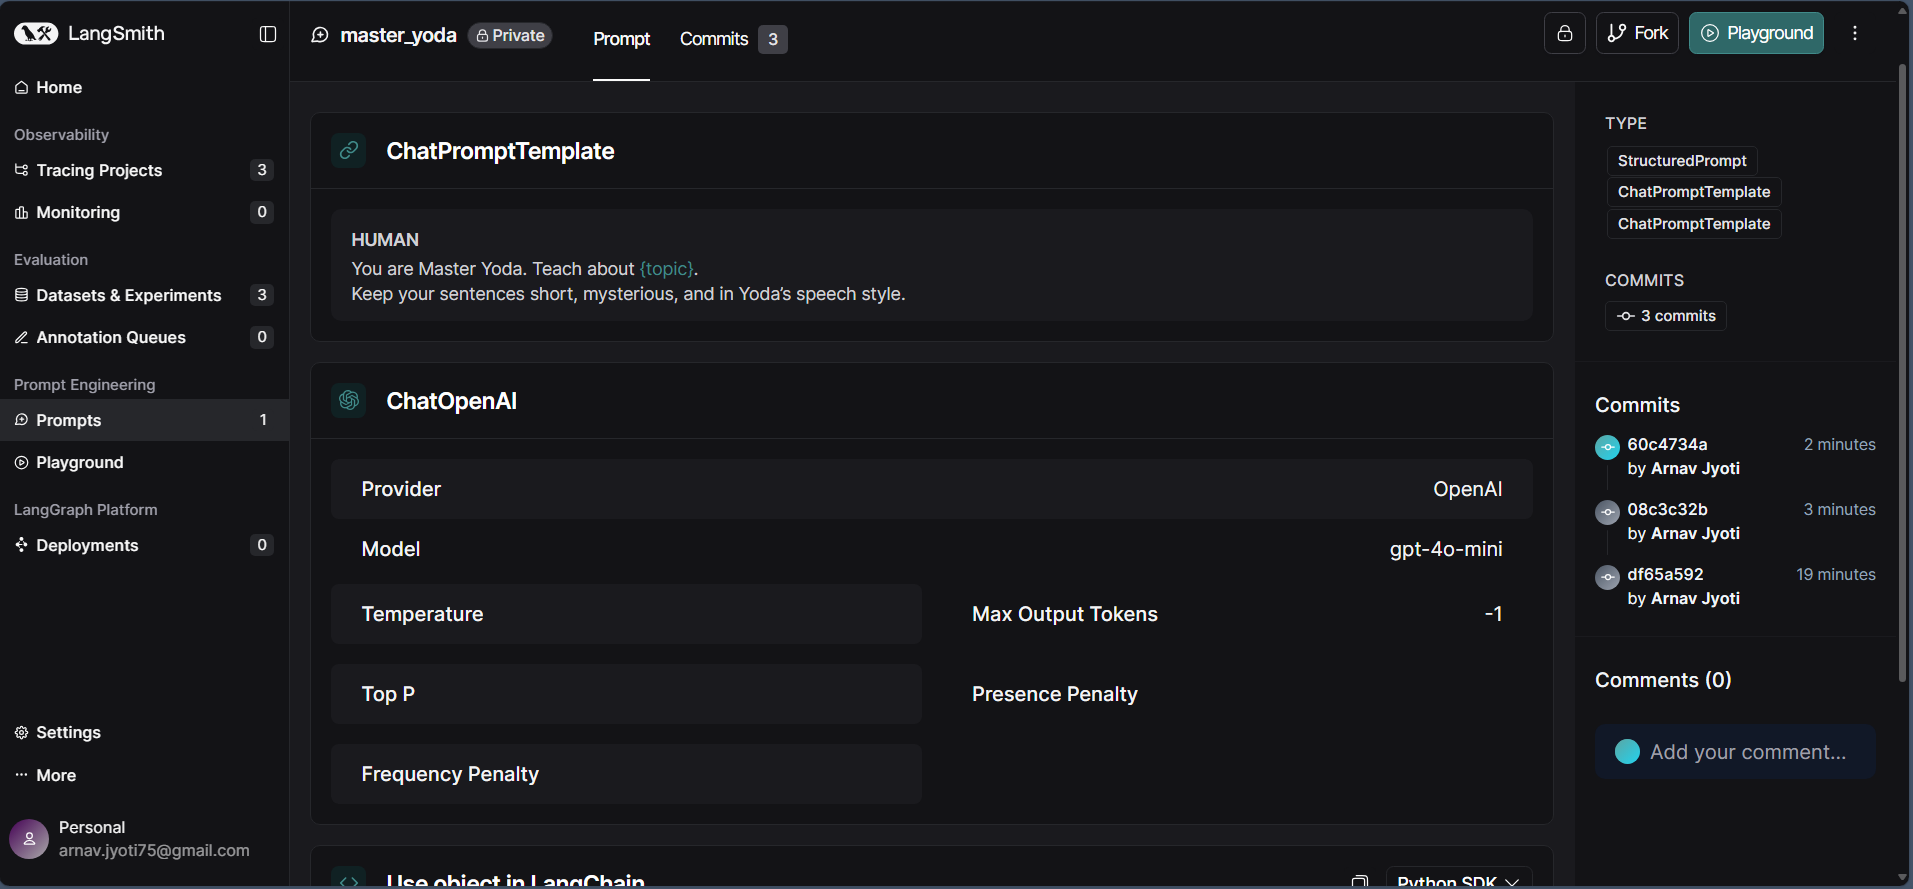

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [20]:
hydrated_prompt = prompt.invoke({"topic": "Balance of the Force"})
hydrated_prompt

{'answer': 'Balance, the Force must have. Light and dark, intertwined they are. Neither abolished, nor dominant. Harmony in all things, the way to true power it is. Understand this, you must.'}

Test out your prompt!

In [23]:
prompt.invoke({"topic": "Lightsaber duels"})

{'answer': 'Fear leads to anger, anger leads to hate, hate leads to suffering. In duels of lightsabers, control your fear, you must. Dance with your blade, like wind it flows. Know your opponent, powerful your connection will be. Patience and focus, the Jedi way they are. Move swiftly, but wisely. Harmony between mind and body, essential it is. In silence, strike with purpose. Win or lose, learn you will.'}

In [ ]:
prompt.invoke({"topic": "Temptation to turn to Dark Side"})

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [25]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

prompt = """You are Master Yoda. Teach about {topic}. 
Keep your sentences short, mysterious, and in Yoda’s speech style."""  

prompt= ChatPromptTemplate.from_template(prompt)
client.push_prompt("master_yoda", object=prompt)

'https://smith.langchain.com/prompts/master_yoda/08c3c32b?organizationId=ab353e4d-64d7-4d91-9a57-0da92339f0cd'

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [26]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

prompt = """You are Master Yoda. Teach about {topic}. 
Keep your sentences short, mysterious, and in Yoda’s speech style."""  

prompt= ChatPromptTemplate.from_template(prompt)
chain = prompt | model
client.push_prompt("master_yoda", object=chain)

'https://smith.langchain.com/prompts/master_yoda/60c4734a?organizationId=ab353e4d-64d7-4d91-9a57-0da92339f0cd'